https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

Recommender system 
Discretized price - explicit/ implicit feedback in the scale of 1-5, 1-least expensive- 5-most expensive
User - SellerG
Item - Address

	Column_names	Description
0	Suburb	Suburb
1	Address	Address
2	Rooms	Number of rooms
3	Type	Type br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
4	Price	Price in Australian dollars
5	Method	Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not ...
6	SellerG	Real Estate Agent
7	Date	Date sold
8	Distance	Distance from CBD in Kilometres
9	Postcode	Postcode
10	Bedroom2	Scraped # of Bedrooms (from different source)
11	Bathroom	Number of Bathrooms
12	Car	Number of carspots
13	Landsize	Land Size in Metres
14	BuildingArea	Building Size in Metres
15	YearBuilt	Year the house was built
16	CouncilArea	Governing council for the area
17	Lattitude	Lattitude
18	Longtitude	Longtitude
19	Regionname	General Region (West, North West, North, North east …etc)
20	Propertycount	Number of properties that exist in the suburb.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.graphics.tsaplots as smgt
from statsmodels.stats import stattools
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,StratifiedKFold,learning_curve,KFold,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel, RFE,SelectPercentile,f_regression,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [34]:
df= pd.read_csv('Melbourne_housing_FULL.csv')

In [35]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [36]:
#Remove those redundant attributes 
#df.drop(['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'],axis=1,inplace=True)

In [37]:
#Continuous features 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Missing values 

In [39]:
#simplificity, missing values > 40% of the dataset, remove them. Imputing them with mean, mode, median might impose a data skewness
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [40]:
df.dropna(inplace= True)

In [41]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

Exploratory Data Analysis (EDA) 

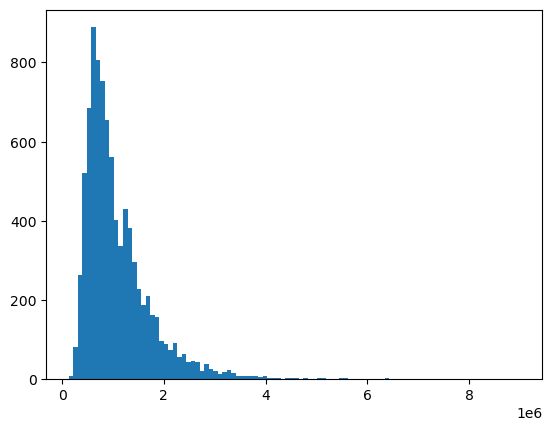

In [21]:
plt.hist(df['Price'],bins=100)
plt.show()

Normalization of Data 

In [45]:
#normalize the data [0-1] using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df[['Price']])

In [50]:
df_normalized = pd.DataFrame(df_scale)

In [53]:
df['Price_min_max'] = df_scale

In [55]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_min_max
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.101928
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.150412
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,0.165633
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,0.196753
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,0.169692


In [56]:
df_prep = df[['SellerG','Price_min_max']]

In [57]:
df_prep

,SellerG,Price_min_max
2,Biggin,0.101928
4,Biggin,0.150412
6,Nelson,0.165633
11,Nelson,0.196753
14,Nelson,0.169692
...,...,...
34847,Ray,0.041606
34849,RW,0.049498
34853,Sweeney,0.085353
34854,Jas,0.064720


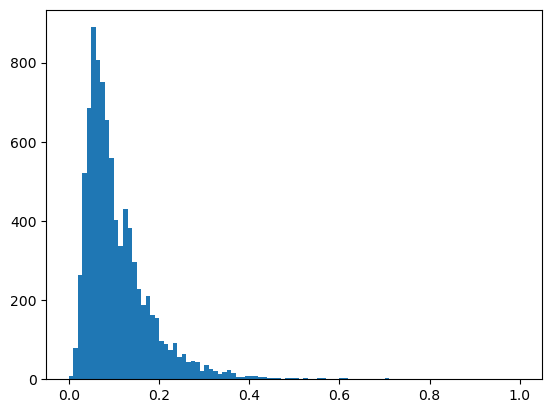

In [58]:
plt.hist(df['Price_min_max'],bins=100)
plt.show()

Discretize price by using K-means clustering to facilitate as explicit/implicit feedback

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:
#assuming you have a DataFrame called 'df' with the variable you want to cluster
df_kmean = df_prep[['Price_min_max']]

In [61]:
#initialize lists to store the inertia and silhouette scores for different values of K
inertia_values = []
silhouette_scores = []

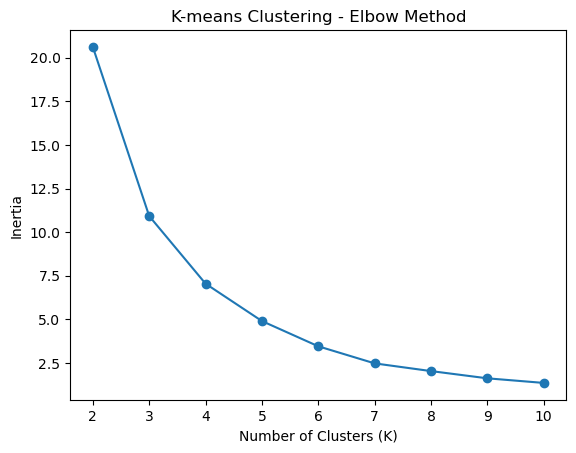

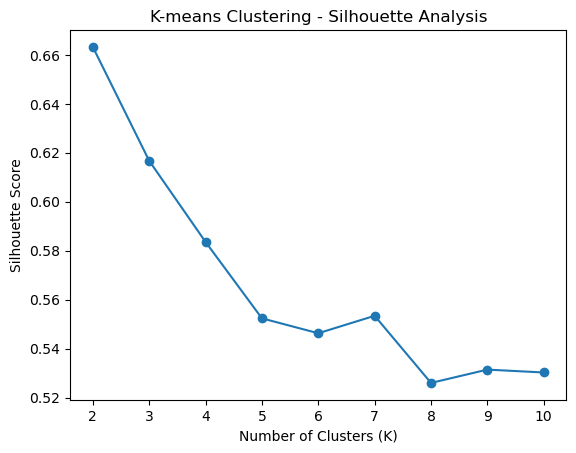

In [62]:
# Define the range of K values to evaluate
k_values = range(2, 11)  # Choose a range of K values to consider

# Perform K-means clustering for different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_kmean)
    
    # Append the inertia and silhouette scores to the respective lists
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_kmean, kmeans.labels_))

# Plot the inertia values
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K-means Clustering - Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering - Silhouette Analysis')
plt.show()

In [69]:
# Assuming you have a DataFrame called 'df' with the dataset
data = df_prep[['Price_min_max']]  # Extract the data from the DataFrame

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Specify the desired number of clusters
kmeans.fit(data)

# Get the cluster labels for each data point
cluster_labels = kmeans.predict(data)

# Create a new column in the DataFrame to store the cluster labels
df_prep['Discretized_Price'] = cluster_labels

# Print the DataFrame with the assigned cluster labels
df_prep.head(100)

KeyError: "None of [Index(['Price_min_max'], dtype='object')] are in the [columns]"

In [65]:
df_prep.drop('Price_min_max',axis=1,inplace= True)

In [76]:
df_prep.to_csv('Discretize_Price.csv')

In [73]:
df_prep.head(10)
df_prep['Discretized_Price'] = df_prep[['Discretized_Price']] +1 

In [74]:
df_prep.head(10)

,SellerG,Discretized_Price
2,Biggin,5
4,Biggin,2
6,Nelson,2
11,Nelson,2
14,Nelson,2
18,Biggin,5
24,Nelson,5
25,Biggin,1
30,Jellis,5
32,Jellis,5
